In [205]:
#import packages 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split

In [206]:
#load data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

### Data Exploration

In [207]:
train.head(10)

,id,tenure,claim.ind,n.adults,n.children,ni.gender,ni.marital.status,premium,sales.channel,coverage.type,dwelling.type,len.at.res,credit,house.color,ni.age,year,zip.code,cancel
0,1,12.0,0.0,4.0,2.0,F,1.0,895.615617,Broker,B,Condo,13.0,high,blue,47.0,2013,80020.0,0
1,2,18.0,0.0,2.0,0.0,M,1.0,828.332372,Broker,C,Tenant,15.0,high,white,47.0,2013,50025.0,0
2,3,4.0,0.0,2.0,0.0,M,0.0,1003.061685,Phone,B,House,10.0,medium,blue,30.0,2013,50025.0,0
3,4,16.0,0.0,1.0,0.0,F,1.0,1092.448192,Broker,C,Condo,22.0,high,red,38.0,2013,80026.0,0
4,5,14.0,0.0,3.0,3.0,M,1.0,885.474246,Phone,A,Tenant,18.0,low,white,49.0,2013,50054.0,0
5,6,14.0,0.0,3.0,0.0,F,0.0,897.395730,Broker,C,House,19.0,high,white,40.0,2013,85076.0,0
6,7,19.0,0.0,1.0,1.0,F,0.0,855.010261,Phone,A,Tenant,21.0,high,white,51.0,2013,15057.0,0
7,8,13.0,1.0,1.0,0.0,M,0.0,789.141021,Broker,C,Condo,10.0,high,blue,47.0,2013,85027.0,0
8,9,11.0,1.0,1.0,3.0,F,1.0,986.107939,Broker,C,Tenant,18.0,medium,red,42.0,2013,50020.0,0
9,10,14.0,0.0,4.0,1.0,M,1.0,991.810044,Broker,C,House,16.0,high,white,50.0,2013,50009.0,0


In [208]:
train.describe(include=[np.object])

,ni.gender,sales.channel,coverage.type,dwelling.type,credit,house.color
count,7566,7566,7574,7567,7567,7570
unique,2,3,3,3,3,4
top,M,Broker,C,House,high,white
freq,3956,4358,3175,4239,4678,2937


In [209]:
train.describe(exclude=[np.object])

,id,tenure,claim.ind,n.adults,n.children,ni.marital.status,premium,len.at.res,ni.age,year,zip.code,cancel
count,7578.000000,7576.000000,7568.000000,7573.000000,7577.000000,7571.000000,7572.000000,7573.000000,7571.000000,7578.000000,7574.000000,7578.000000
mean,3790.458168,11.709741,0.203356,2.133765,1.781180,0.716814,901.412014,15.196580,43.634776,2014.629454,62285.434513,0.239905
std,2188.948270,5.974099,0.402522,1.247898,2.364747,0.450576,77.547679,4.545712,12.233355,1.106778,28072.820981,0.434711
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,645.816663,2.000000,19.000000,2013.000000,15001.000000,-1.000000
25%,1895.250000,6.000000,0.000000,1.000000,0.000000,0.000000,845.844950,12.000000,35.000000,2014.000000,50013.000000,0.000000
50%,3789.500000,13.000000,0.000000,2.000000,1.000000,1.000000,901.419084,15.000000,43.000000,2015.000000,80013.500000,0.000000
75%,5684.750000,16.000000,0.000000,3.000000,3.000000,1.000000,956.247706,18.000000,51.000000,2016.000000,85034.000000,0.000000
max,7582.000000,30.000000,1.000000,9.000000,12.000000,1.000000,1164.790826,49.408710,216.497429,2016.000000,98038.000000,1.000000


In [210]:
#missing values

train.isnull().sum()

id                    0
tenure                2
claim.ind            10
n.adults              5
n.children            1
ni.gender            12
ni.marital.status     7
premium               6
sales.channel        12
coverage.type         4
dwelling.type        11
len.at.res            5
credit               11
house.color           8
ni.age                7
year                  0
zip.code              4
cancel                0
dtype: int64

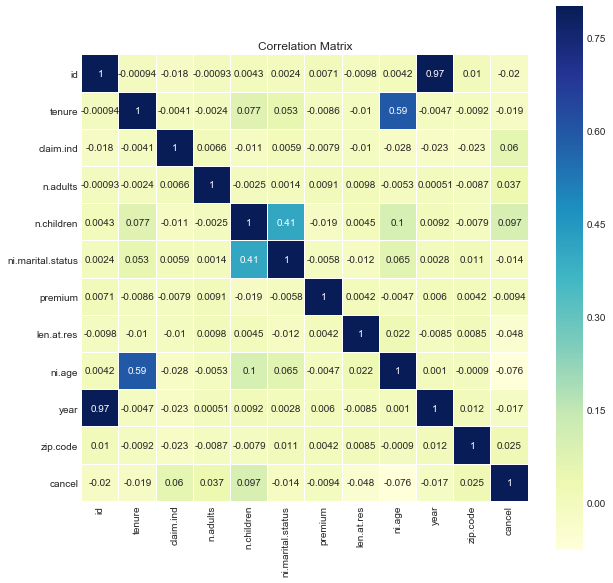

In [211]:
#correlation

corr=train.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation Matrix')
plt.show()

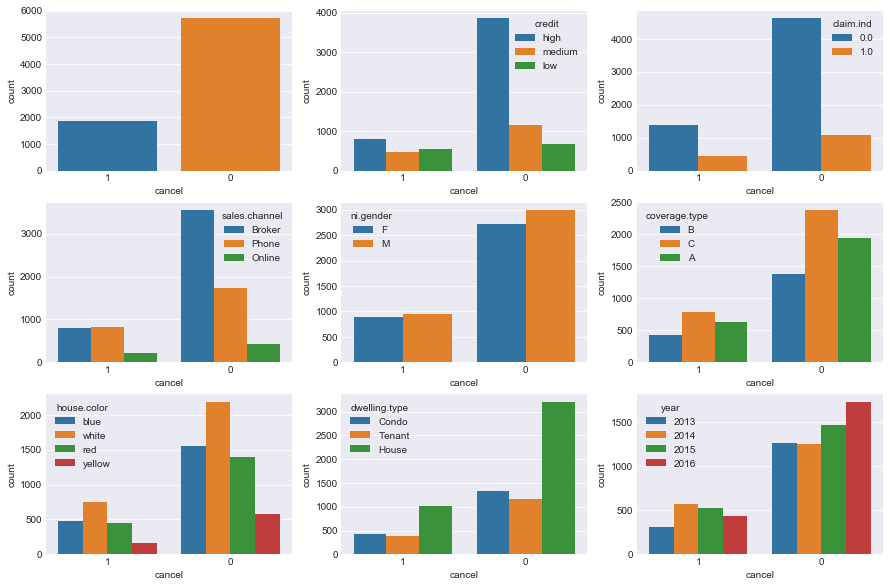

In [212]:
#categorical variables with target

stats_data = train
fig, [[axis1,axis2,axis3], [axis4,axis5,axis6], [axis7,axis8,axis9]] = plt.subplots(3,3,figsize=(15,10))

sns.countplot(x='cancel', data=stats_data, ax=axis1, order=[1,0])
sns.countplot(x='cancel', hue="credit", data=stats_data, order=[1,0], ax=axis2)
sns.countplot(x='cancel', hue="claim.ind", data=stats_data, order=[1,0], ax=axis3)
sns.countplot(x='cancel', hue="sales.channel", data=stats_data, order=[1,0], ax=axis4)
sns.countplot(x='cancel', hue="ni.gender", data=stats_data, order=[1,0], ax=axis5)
sns.countplot(x='cancel', hue="coverage.type", data=stats_data, order=[1,0], ax=axis6)
sns.countplot(x='cancel', hue="house.color", data=stats_data, order=[1,0], ax=axis7)
sns.countplot(x='cancel', hue="dwelling.type", data=stats_data, order=[1,0], ax=axis8)
sns.countplot(x='cancel', hue="year", data=stats_data, order=[1,0], ax=axis9)

plt.show()

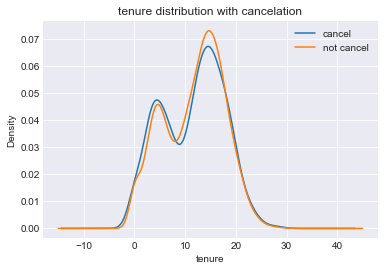

In [213]:
#numerical variables with target 

train["tenure"][train["cancel"]==1].plot(kind='kde') 
train["tenure"][train["cancel"]==0].plot(kind='kde') 

plt.xlabel("tenure")    
plt.title("tenure distribution with cancelation")
plt.legend(('cancel', 'not cancel'),loc='best')
plt.show()

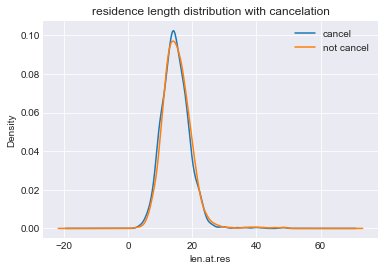

In [214]:
train["len.at.res"][train["cancel"]==1].plot(kind='kde') 
train["len.at.res"][train["cancel"]==0].plot(kind='kde') 

plt.xlabel("len.at.res")    
plt.title("residence length distribution with cancelation")
plt.legend(('cancel', 'not cancel'),loc='best')
plt.show()

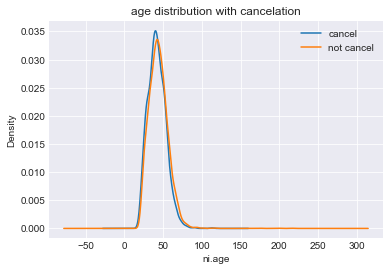

In [215]:
train["ni.age"][train["cancel"]==1].plot(kind='kde') 
train["ni.age"][train["cancel"]==0].plot(kind='kde') 

plt.xlabel("ni.age")    
plt.title("age distribution with cancelation")
plt.legend(('cancel', 'not cancel'),loc='best')
plt.show()

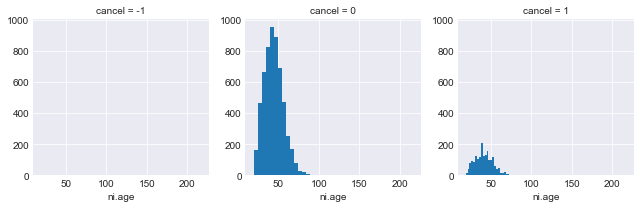

In [216]:
grid = sns.FacetGrid(train, col='cancel')
grid.map(plt.hist, 'ni.age',bins=40)
sns.set_style('darkgrid')
plt.show()

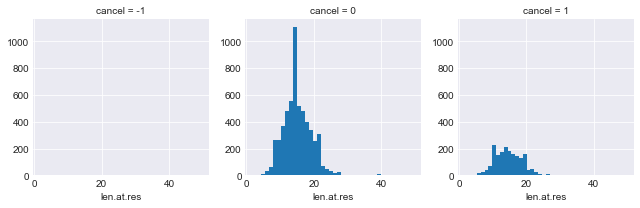

In [217]:
grid = sns.FacetGrid(train, col='cancel')
grid.map(plt.hist, 'len.at.res',bins=40)
sns.set_style('darkgrid')
plt.show()

### Data Preprocessing

In [218]:
train = train[train["cancel"] !=-1]
train = train.round(0)
test = test.round(0)

In [219]:
#find those len.at.res > ni.age which does not make sense and fill them with nan
for i in range(0,len(train)):   
    if train.iloc[i,11] > train.iloc[i,14]:                                 
        train.iloc[i,11] = np.nan

for i in range(0,len(test)):   
    if test.iloc[i,11] > test.iloc[i,14]:                                 
        test.iloc[i,11] = np.nan

In [220]:
#there is only one missing value in n.children, he is not married(we found this two variables are highly correlated)
#for those people who are not married, most of them don't have children, so I fill with 0 here 

train["n.children"]= train["n.children"].fillna(0)

In [221]:
#fill credit with fico score rang

train['credit'].replace(['high','medium','low'],[730,675,590],inplace=True)

test['credit'].replace(['high','medium','low'],[730,675,590],inplace=True)

In [222]:
#fill missing values

num = ['n.adults','premium','tenure','len.at.res','ni.age','credit']

cate = ['claim.ind','ni.gender','ni.marital.status',
        'sales.channel','coverage.type','dwelling.type','house.color','zip.code']
    
for m in num:
    train[m] = train[m].fillna(train[m].median())
    test[m] = test[m].fillna(test[m].median())

for n in cate:
    train[n] = train[n].fillna("Other")  
    test[n] = test[n].fillna("Other")
    
test['dwelling.type'].replace(['Landlord'],['Other'],inplace=True)

### Feature Engineering

In [223]:
#zipcode

train['zip.code'] = train['zip.code'].apply(str).str.slice(0,3)
test['zip.code'] = test['zip.code'].apply(str).str.slice(0,3)

In [224]:
#feature interaction: create some new features 

train["familysize"] = train["n.children"] + train["n.adults"]
train["avgprice"] = train["premium"] * train["n.children"] / train["n.adults"]
train["ten/age"] = train["tenure"] / train["ni.age"]

test["familysize"] = test["n.children"] + test["n.adults"]
test["avgprice"] = test["premium"] * test["n.children"] / test["n.adults"]
test["ten/age"] = test["tenure"] / test["ni.age"]

In [225]:
#one hot encoding

cate = ['claim.ind','ni.gender','ni.marital.status','sales.channel','coverage.type','dwelling.type',
        'house.color','zip.code','year']

train1 = train
test1 = test 

for col in cate:
    one_hot = pd.get_dummies(train1[col],prefix=col)
    train1 = pd.concat([train1,one_hot],axis=1)
    train1 = train1.drop(col,axis=1)
    
for col in cate:
    one_hot = pd.get_dummies(test1[col],prefix=col)
    test1 = pd.concat([test1,one_hot],axis=1)
    test1 = test1.drop(col,axis=1)

In [226]:
train1.columns

Index(['id', 'tenure', 'n.adults', 'n.children', 'premium', 'len.at.res',
       'credit', 'ni.age', 'cancel', 'familysize', 'avgprice', 'ten/age',
       'claim.ind_0.0', 'claim.ind_1.0', 'claim.ind_Other', 'ni.gender_F',
       'ni.gender_M', 'ni.gender_Other', 'ni.marital.status_0.0',
       'ni.marital.status_1.0', 'ni.marital.status_Other',
       'sales.channel_Broker', 'sales.channel_Online', 'sales.channel_Other',
       'sales.channel_Phone', 'coverage.type_A', 'coverage.type_B',
       'coverage.type_C', 'coverage.type_Other', 'dwelling.type_Condo',
       'dwelling.type_House', 'dwelling.type_Other', 'dwelling.type_Tenant',
       'house.color_Other', 'house.color_blue', 'house.color_red',
       'house.color_white', 'house.color_yellow', 'zip.code_150',
       'zip.code_201', 'zip.code_500', 'zip.code_800', 'zip.code_801',
       'zip.code_850', 'zip.code_980', 'zip.code_Oth', 'year_2013',
       'year_2014', 'year_2015', 'year_2016'],
      dtype='object')

In [227]:
test1.columns

Index(['id', 'tenure', 'n.adults', 'n.children', 'premium', 'len.at.res',
       'credit', 'ni.age', 'familysize', 'avgprice', 'ten/age',
       'claim.ind_0.0', 'claim.ind_1.0', 'claim.ind_Other', 'ni.gender_F',
       'ni.gender_M', 'ni.gender_Other', 'ni.marital.status_0.0',
       'ni.marital.status_1.0', 'ni.marital.status_Other',
       'sales.channel_Broker', 'sales.channel_Online', 'sales.channel_Other',
       'sales.channel_Phone', 'coverage.type_A', 'coverage.type_B',
       'coverage.type_C', 'coverage.type_Other', 'dwelling.type_Condo',
       'dwelling.type_House', 'dwelling.type_Other', 'dwelling.type_Tenant',
       'house.color_blue', 'house.color_red', 'house.color_white',
       'house.color_yellow', 'zip.code_150', 'zip.code_201', 'zip.code_500',
       'zip.code_800', 'zip.code_801', 'zip.code_850', 'zip.code_980',
       'zip.code_Oth', 'year_2017'],
      dtype='object')

In [228]:
test1['year_2013']= 0
test1['year_2014']= 0
test1['year_2015']= 0
test1['year_2016']= 0
train1['year_2017']= 0

In [229]:
train1 = train1.drop(['house.color_Other'],axis=1)

### Feature Selection

In [230]:
train_x = train1.drop(['cancel','id','ni.marital.status_0.0',
                       'ni.marital.status_1.0', 'ni.marital.status_Other','zip.code_Oth',
                       'ni.gender_F', 'ni.gender_M', 'ni.gender_Other'],axis=1)

train_y = train1['cancel']
IDcol = train1['id']

finaltest_x = test1.drop(['id','ni.marital.status_0.0',
                          'ni.marital.status_1.0', 'ni.marital.status_Other','zip.code_Oth',
                          'ni.gender_F', 'ni.gender_M', 'ni.gender_Other'],axis=1)
IDcoltest = test1['id']

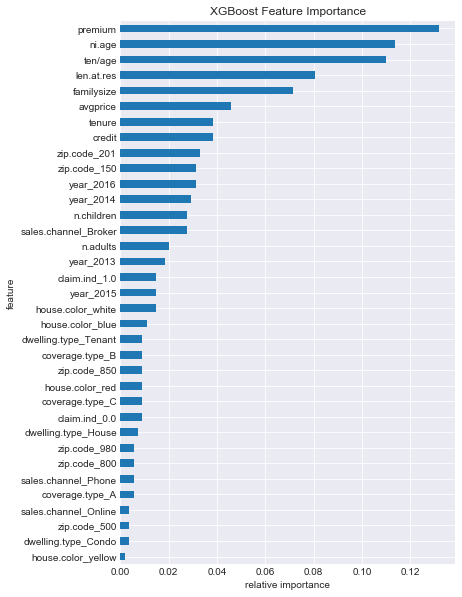

In [231]:
import operator  
import matplotlib.pyplot as plt  

def ceate_feature_map(features):  
    outfile = open('xgb.fmap', 'w')  
    i = 0  
    for feat in features:  
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))  
        i = i + 1  
    outfile.close()  
  
 
param_1 = {'min_child_weight': 100,  
           'eta': 0.02,  
           'colsample_bytree': 0.7,  
           'max_depth': 12,  
           'subsample': 0.7,  
           'alpha': 1,  
           'gamma': 1,  
           'silent': 1,  
           'verbose_eval': True,  
           'seed': 12,
           'objective':'binary:logistic',
          }  

param_2 = {'bst:max_depth':10, 
           'bst:eta':0.01, 
           'silent':0, 
           'objective':'binary:logistic',
           'nthread':4, 
          }


rounds = 10  
feature = train_x
label = train_y 
  
dtrain = xgb.DMatrix(feature, label=label)  
bst = xgb.train(param_2, dtrain, num_boost_round=rounds)  
  
features = [x for x in feature.columns]  
ceate_feature_map(features)  
  
importance = bst.get_fscore(fmap='xgb.fmap')  
importance = sorted(importance.items(), key=operator.itemgetter(1))  
  
df = pd.DataFrame(importance, columns=['feature', 'fscore'])  
df['fscore'] = df['fscore'] / df['fscore'].sum()  
#df.to_csv("../modeler/feat_importance.csv", index=False)  
  
plt.figure()  
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))  
plt.title('XGBoost Feature Importance')  
plt.xlabel('relative importance')  
plt.show()

In [232]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(train_x, train_y, random_state=0)

In [233]:
def modelfit(alg, train_x,  train_y, test_x, test_y, finaltest_x, predictors, useTrainCV=True, cv_folds=10, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(train_x.values, label=train_y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, 
                          metrics='auc', early_stopping_rounds=early_stopping_rounds, show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train_x, train_y,eval_metric='auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(train_x)
    dtrain_predprob = alg.predict_proba(train_x)[:,1]
    
    #Predict test set:
    dtest_predictions = alg.predict(test_x)
    pred2 = pd.DataFrame(dtest_predictions)
    dtest_predprob = alg.predict_proba(test_x)[:,1]
    prob2 = pd.DataFrame(dtest_predprob)
    
    #Predict finaltest set:
    dtest_predictions1 = alg.predict(finaltest_x)
    pred = pd.DataFrame(dtest_predictions1)
    dtest_predprob1 = alg.predict_proba(finaltest_x)[:,1]
    prob = pd.DataFrame(dtest_predprob1)
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy (train) : %.4g" % metrics.accuracy_score(train_y.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(train_y, dtrain_predprob))
    print ("Accuracy (test): %.4g" % metrics.accuracy_score(test_y.values, dtest_predictions))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(test_y, dtest_predprob))
#    pred.to_csv("pred.csv", index=False)  
#    prob.to_csv("prob.csv", index=False) 

In [234]:
finaltest_x = finaltest_x.drop(["year_2017"],axis=1)
finaltest_x["year_2017"] = 1

In [235]:
train_x1.columns

Index(['tenure', 'n.adults', 'n.children', 'premium', 'len.at.res', 'credit',
       'ni.age', 'familysize', 'avgprice', 'ten/age', 'claim.ind_0.0',
       'claim.ind_1.0', 'claim.ind_Other', 'sales.channel_Broker',
       'sales.channel_Online', 'sales.channel_Other', 'sales.channel_Phone',
       'coverage.type_A', 'coverage.type_B', 'coverage.type_C',
       'coverage.type_Other', 'dwelling.type_Condo', 'dwelling.type_House',
       'dwelling.type_Other', 'dwelling.type_Tenant', 'house.color_blue',
       'house.color_red', 'house.color_white', 'house.color_yellow',
       'zip.code_150', 'zip.code_201', 'zip.code_500', 'zip.code_800',
       'zip.code_801', 'zip.code_850', 'zip.code_980', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'year_2017'],
      dtype='object')

In [236]:
finaltest_x.columns

Index(['tenure', 'n.adults', 'n.children', 'premium', 'len.at.res', 'credit',
       'ni.age', 'familysize', 'avgprice', 'ten/age', 'claim.ind_0.0',
       'claim.ind_1.0', 'claim.ind_Other', 'sales.channel_Broker',
       'sales.channel_Online', 'sales.channel_Other', 'sales.channel_Phone',
       'coverage.type_A', 'coverage.type_B', 'coverage.type_C',
       'coverage.type_Other', 'dwelling.type_Condo', 'dwelling.type_House',
       'dwelling.type_Other', 'dwelling.type_Tenant', 'house.color_blue',
       'house.color_red', 'house.color_white', 'house.color_yellow',
       'zip.code_150', 'zip.code_201', 'zip.code_500', 'zip.code_800',
       'zip.code_801', 'zip.code_850', 'zip.code_980', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'year_2017'],
      dtype='object')

In [237]:
predictors = [x for x in train_x1.columns]
target = 'cancel'
xgb1 = XGBClassifier(learning_rate =0.1,
                     n_estimators=5000,
                     max_depth=1,
                     min_child_weight=6,
                     gamma=3.0,
                     subsample=0.8,
                     colsample_bytree=0.85,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27,
                     reg_alpha = 1,
                     reg_lambda =10.2)

modelfit(xgb1, train_x1, train_y1, test_x1, test_y1, finaltest_x, predictors)


Model Report
Accuracy (train) : 0.771
AUC Score (Train): 0.744282
Accuracy (test): 0.7851
AUC Score (Test): 0.745543


In [238]:
#adjusting parameters process 

from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional     scklearn functions
from sklearn.grid_search import GridSearchCV#Perforing grid search
from sklearn import grid_search

#randomly set original parameters.
predictors = [x for x in train_x.columns]
target = 'cancel'
xgb4 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=1,
                     min_child_weight=1,
                     gamma=1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27,
                     reg_alpha=1,
                     reg_lambda=1)
modelfit(xgb4, train_x1, train_y1, test_x1, test_y1, finaltest_x, predictors)

#select best max_depth and min_child_weight
param_test1 = {'max_depth':[1,3,5], 'min_child_weight':[1,3,5]}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=1, gamma=1, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  reg_alpha=1,reg_lambda=1), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(train_x1,train_y1)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

param_test2 = {'max_depth':[1,2,4],'min_child_weight':[4,5,6]}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=1, gamma=1, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  reg_alpha=1,reg_lambda=1.), 
                        param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_x1,train_y1)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

#select best gamma
param_test3 = {'gamma':[i/10.0 for i in range(0,21)]}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=4, gamma=1, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  reg_alpha=1,reg_lambda=1), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_x1,train_y1)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

param_test3 = {'gamma':[i/10.0 for i in range(21,31)]}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=4, gamma=1, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  reg_alpha=1,reg_lambda=1), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_x1,train_y1)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

#see if our auc increase followed after above steps
predictors = [x for x in train_x.columns]
target = 'cancel'
xgb2 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=1,
                     min_child_weight=6,
                     gamma=3.0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27,
                     reg_alpha=1,
                     reg_lambda=1)
modelfit(xgb2, train_x1, train_y1, test_x1, test_y1, finaltest_x, predictors)

#find best subsample and colsample
param_test4 = {'subsample':[i/10.0 for i in range(6,10)],
               'colsample_bytree':[i/10.0 for i in range(6,10)]}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=6, gamma=3.0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,
                                                  reg_alpha=1,reg_lambda=1), 
                        param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(train_x1,train_y1)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

param_test5 = {'subsample':[i/100.0 for i in range(60,100,5)],
               'colsample_bytree':[i/100.0 for i in range(60,100,5)]}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=6, gamma=3.0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,
                                                  reg_alpha=1,reg_lambda=1), 
                        param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_x1,train_y1)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

param_test6 = {'reg_alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=6, gamma=3.0, subsample=0.9, colsample_bytree=0.85,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,
                                                  reg_alpha=1,reg_lambda=1), 
                        param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train_x1,train_y1)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

param_test7 = {'reg_alpha':[0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=6, gamma=3.0, subsample=0.9, colsample_bytree=0.85,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,
                                                  reg_alpha=1,reg_lambda=1), 
                        param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train_x1,train_y1)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

predictors = [x for x in train_x.columns]
target = 'cancel'
xgb3 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=1,
                     min_child_weight=6,
                     gamma=3.0,
                     subsample=0.9,
                     colsample_bytree=0.85,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27,
                     reg_alpha= 1.5,
                     reg_lambda=1)
modelfit(xgb3, train_x1, train_y1, test_x1, test_y1, finaltest_x, predictors)

param_test9 = {'reg_lambda':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]}
gsearch9 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=4, gamma=2.4, subsample=0.8, colsample_bytree=0.85,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,
                                                  reg_alpha= 1, reg_lambda=1), 
                        param_grid = param_test9, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch9.fit(train_x1,train_y1)
gsearch9.grid_scores_, gsearch9.best_params_, gsearch9.best_score_

param_test10 = {'reg_lambda':[9.6,9.8,10,10.2,10.4]}
gsearch10 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=1,
                                                  min_child_weight=4, gamma=2.4, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,
                                                  reg_alpha= 1, reg_lambda=1), 
                        param_grid = param_test10, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch10.fit(train_x1,train_y1)
gsearch10.grid_scores_, gsearch10.best_params_, gsearch10.best_score_

predictors = [x for x in train_x.columns]
target = 'cancel'
xgb4 = XGBClassifier(learning_rate =0.1,
                     n_estimators=5000,
                     max_depth=1,
                     min_child_weight=4,
                     gamma=2.4,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27,
                     reg_alpha=1,
                     reg_lambda=10.2)
modelfit(xgb4, train_x1, train_y1, test_x1, test_y1, finaltest_x, predictors)